In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install lightgbm

In [2]:
#impoting the necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [3]:
#reading the CSV file
df = pd.read_csv('data.csv')

In [4]:
#describing the DataFrame
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
#checking for missing values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

C:\Users\abdul\AppData\Local\Temp\ipykernel_20992\3864218422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DEATH_EVENT', data=df, palette='Set2')


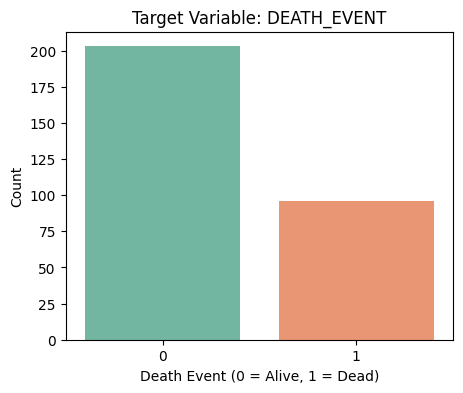

In [6]:
# Plot target distribution
plt.figure(figsize=(5, 4))
sns.countplot(x='DEATH_EVENT', data=df, palette='Set2')
plt.title('Target Variable: DEATH_EVENT')
plt.xlabel('Death Event (0 = Alive, 1 = Dead)')
plt.ylabel('Count')
plt.show()

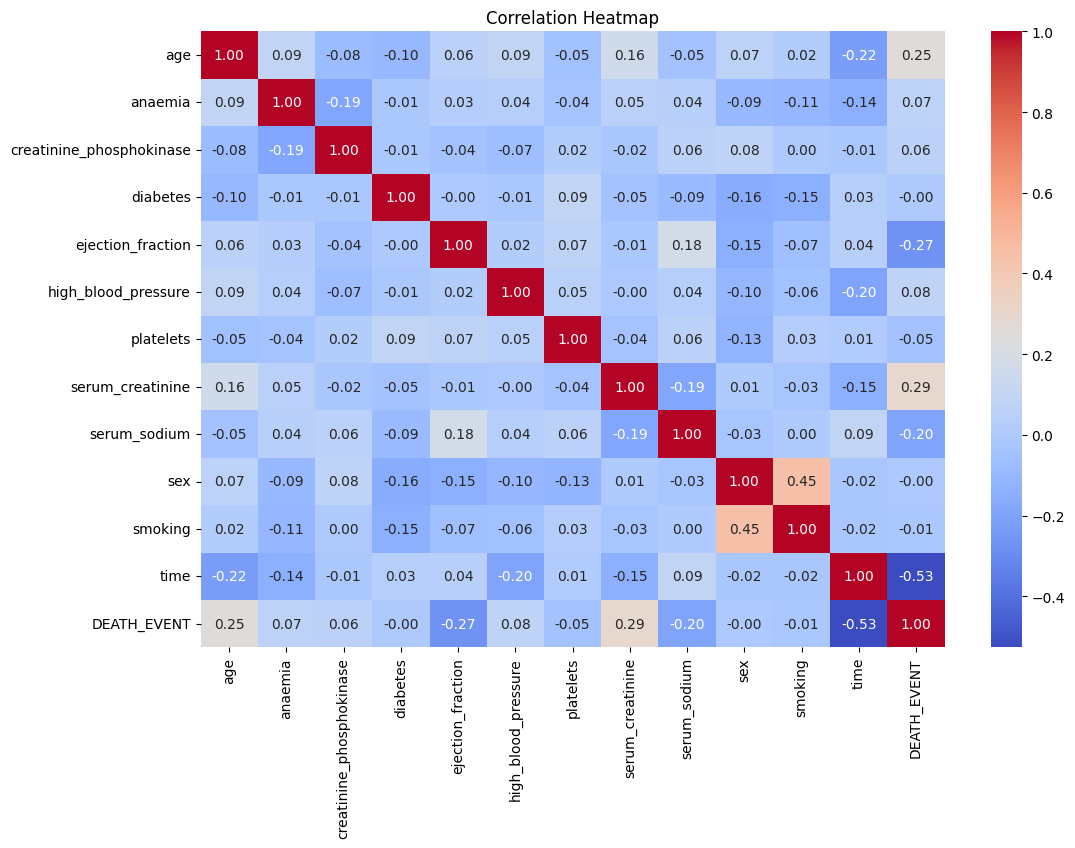

In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Based on the correlation heatmap, we can see that DEATH_EVENT is correlated with the following features:
1. ejection_fraction
2. serum_creatinine
3. time
4. serum_sodium
The correlation with the other features is weak or nearly zero.

In [8]:
X = df.drop('DEATH_EVENT', axis=1) #X contains all features except the target variable
y = df['DEATH_EVENT'] #y contains the target variable

In [9]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
#scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
#training the logistic regression model, this will be used as a baseline model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [12]:
#using the trained model to make predictions
y_pred = logistic_model.predict(X_test_scaled)
y_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]


In [13]:
#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)   
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
print(f'Accuracy: {accuracy:.2f}')  
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

Accuracy: 0.82
Precision: 0.79
Recall: 0.58
F1 Score: 0.67
ROC AUC: 0.86


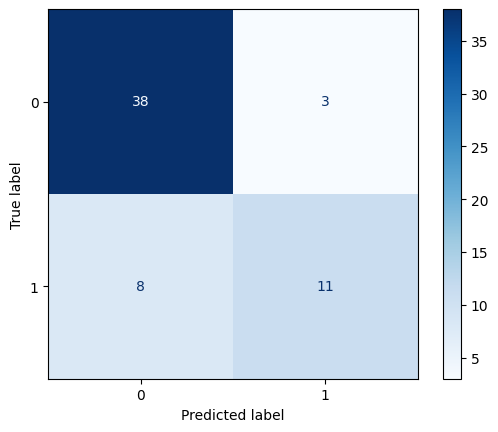

In [14]:
#creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot(cmap=plt.cm.Blues)

In [15]:
#the scores show that the recall of the model is low, which means that the model is not able to identify all the patients who died. This is a problem because we want to identify all the patients who died. The precision of the model is also low, which means that the model is not able to identify all the patients who died correctly. This is also a problem because we want to identify all the patients who died correctly.
#we will try to improve the model by using balance class weights in the logistic regression model
logistic_model_balanced = LogisticRegression(class_weight='balanced')
logistic_model_balanced.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

In [16]:
y_pred_balanced = logistic_model_balanced.predict(X_test_scaled)
y_prob_balanced = logistic_model_balanced.predict_proba(X_test_scaled)[:, 1]

In [17]:
#Evaluating the model
accuracy = accuracy_score(y_test, y_pred_balanced)
precision = precision_score(y_test, y_pred_balanced)
recall = recall_score(y_test, y_pred_balanced)   
f1 = f1_score(y_test, y_pred_balanced)
roc_auc = roc_auc_score(y_test, y_prob_balanced)
print(f'Accuracy: {accuracy:.2f}')  
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

Accuracy: 0.80
Precision: 0.73
Recall: 0.58
F1 Score: 0.65
ROC AUC: 0.85


In [18]:
#that did not help at all, so we will try to use a Random Forest Classifier   
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
random_forest_model.fit(X_train_scaled, y_train)
y_pred_rf = random_forest_model.predict(X_test_scaled)
y_prob_rf = random_forest_model.predict_proba(X_test_scaled)[:, 1]
#Evaluating the Random Forest model
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

Random Forest Classifier:
Accuracy: 0.85
Precision: 0.8571428571428571
Recall: 0.631578947368421
F1 Score: 0.7272727272727273
ROC AUC: 0.9050064184852374


In [19]:
lgb_model = LGBMClassifier(scale_pos_weight=2.5, random_state=42)
lgb_model.fit(X_train_scaled, y_train)
y_pred_lgb = lgb_model.predict(X_test_scaled)
y_prob_lgb = lgb_model.predict_proba(X_test_scaled)[:, 1]
#Evaluating the LightGBM model
print("LightGBM Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Precision:", precision_score(y_test, y_pred_lgb))
print("Recall:", recall_score(y_test, y_pred_lgb))
print("F1 Score:", f1_score(y_test, y_pred_lgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lgb))


[LightGBM] [Info] Number of positive: 77, number of negative: 162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 303
[LightGBM] [Info] Number of data points in the train set: 239, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.322176 -> initscore=-0.743791
[LightGBM] [Info] Start training from score -0.743791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\abdul\Documents\Myocardial-infarction-detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\abdul\Documents\Myocardial-infarction-detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


We got the best possible results using LightGBM. Although the results are not the best, especially the recall, that is the best we are able to do given the limitation of the dataset itself. The limitations include imbalanced dataset and not enough dimensions to create synthetic data. We may be able to improve the performance of the models a little better using hyper-parameter tuning. 